In [6]:
from unityagents import UnityEnvironment
import numpy as np
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
import datetime

import pandas as pd

In [2]:
env = UnityEnvironment(file_name="./Banana.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [3]:
def dqn(dqn_str="DQN", n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    avg_scores = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break 
        scores_window.append(score)       # save most recent score
        avg_scores.append(np.mean(scores_window))
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_%s.pth'%dqn_str)
            break
    return scores, avg_scores


In [4]:
from dqn_agent import DQNAgent, DDQNAgent

agent = DDQNAgent(state_size=37, action_size=4, seed=1919)

# watch an untrained agent
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


START_TIME = 2018-10-13 22:54:27.510147
Episode 100	Average Score: 0.65
Episode 200	Average Score: 4.06
Episode 300	Average Score: 7.43
Episode 400	Average Score: 10.05
Environment solved in 486 episodes!	Average Score: 13.01
END_TIME = 2018-10-14 03:00:25.638260
486 486 486


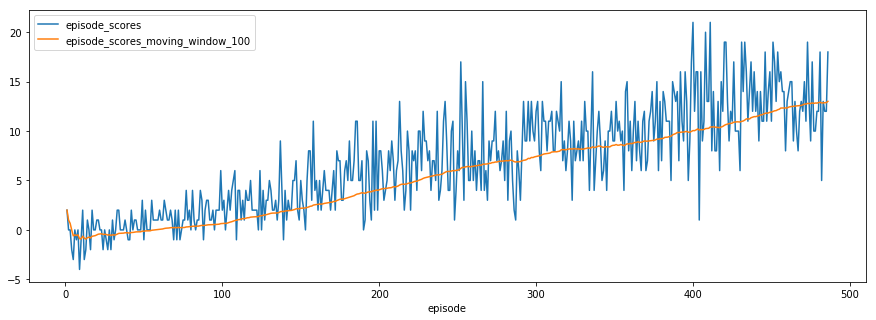

In [7]:
print("START_TIME = %s" % datetime.datetime.now())
scores, avg_scores = dqn(dqn_str="DDQN")
print("END_TIME = %s" % datetime.datetime.now())

print(len(range(1,len(scores)+1)), len(scores), len(avg_scores))
plot_df = pd.DataFrame()
plot_df['episode'] = range(1,len(scores)+1)
plot_df['episode_scores'] = scores
plot_df['episode_scores_moving_window_100'] = avg_scores

plot_df.plot(x='episode', y=['episode_scores', 'episode_scores_moving_window_100'])

In [12]:
print("Scores => mean - %.3f, deviation - %.3f" % (np.mean(scores), np.std(scores)))
print("Window Avg Scores => mean - %.3f, deviation - %.3f" % (np.mean(avg_scores), np.std(avg_scores)))

Scores => mean - 6.872, deviation - 5.244
Window Avg Scores => mean - 5.519, deviation - 4.220


In [13]:
env.close()